In [1]:
from funcs import *
import matplotlib.pyplot as plt
import cv2
from Gabor import *

[ WARN:0@1.027] global loadsave.cpp:268 findDecoder imread_('eyes\2L2.bmp'): can't open/read file: check file path/integrity

KeyboardInterrupt



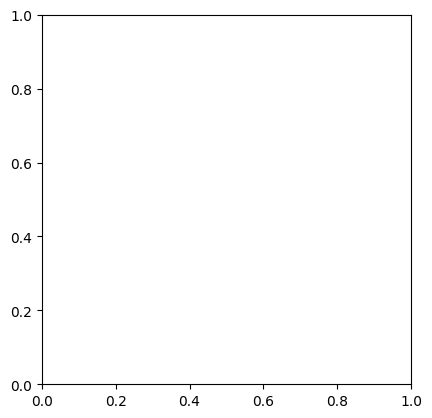

In [2]:
image_raw = cv2.imread('eyes\\2L2.bmp', 0)
plt.imshow(image_raw, cmap='gray')

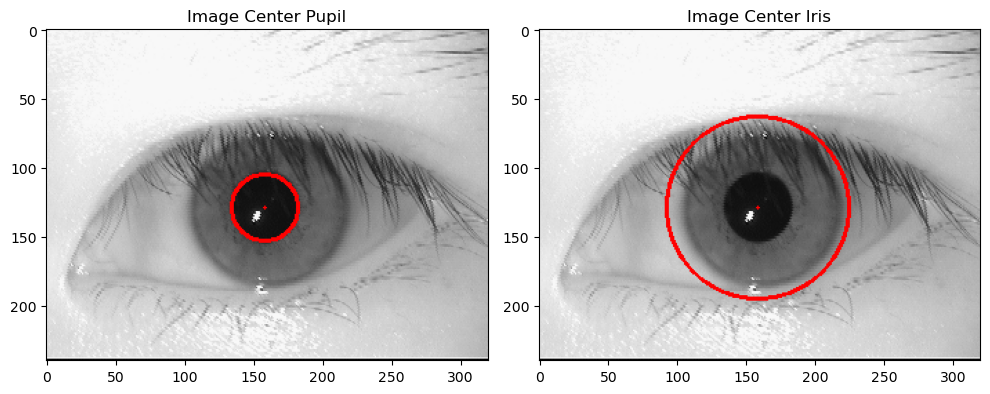

In [ ]:
image_center_pupil, (x, y), radius_pupil = get_pupil(image_raw)
image_center_iris, (x, y), radius_iris = get_iris(image_raw, x, y, radius_pupil)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_center_pupil, cmap='gray')
ax[0].set_title('Image Center Pupil')
ax[1].imshow(image_center_iris, cmap='gray')
ax[1].set_title('Image Center Iris')
plt.tight_layout()

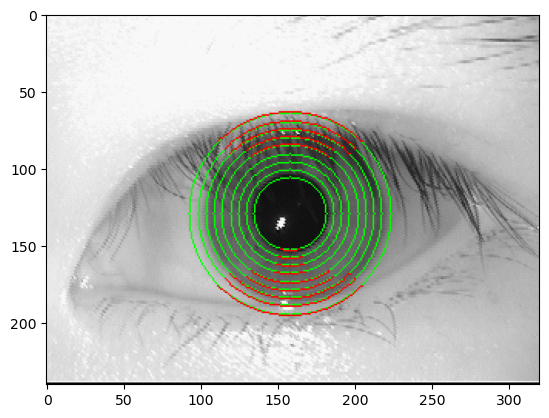

In [ ]:
img_circles = draw_rings_with_cuts(image_raw, x, y, radius_pupil, radius_iris)
plt.imshow(img_circles, cmap='gray')

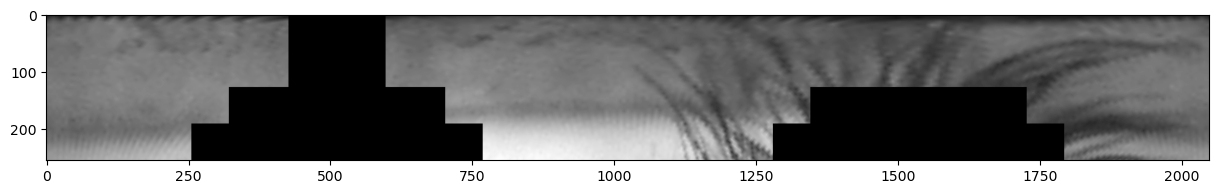

In [ ]:
iris = unwrap_iris_with_masks(
    image=image_raw,
    x=x,
    y=y,
    r_pupil=radius_pupil,
    r_iris=radius_iris,
    height=256,
    width=2048
)

plt.figure(figsize=(15, 15))
plt.imshow(iris, cmap='gray')

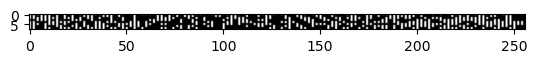

In [ ]:
code2 = generate_iris_code(iris)
plt.imshow(code2, cmap='gray')

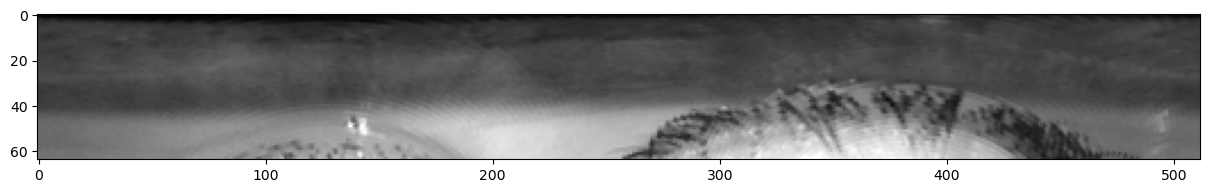

In [ ]:
iris = normalize_iris(
    image=image_raw,
    x=x,
    y=y,
    r_pupil=radius_pupil,
    r_iris=radius_iris,
    height=64,
    width=512
)
plt.figure(figsize=(15, 15))
plt.imshow(iris, cmap='gray')

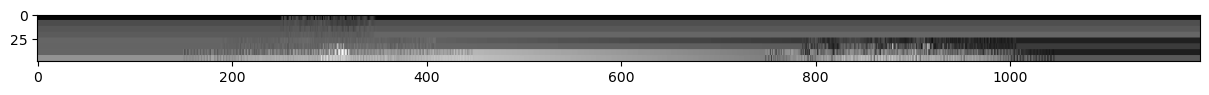

In [ ]:
iris = unwrap_iris(
    image=image_raw,
    cx=x,
    cy=y,
    r_pupil=radius_pupil,
    r_iris=radius_iris
)
plt.figure(figsize=(15, 15))
plt.imshow(iris, cmap='gray')

In [ ]:
print(radius_pupil)

22


/var/folders/yx/857vdk_j67j9v688jjd81j8c0000gn/T/ipykernel_76507/3739947275.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 5))


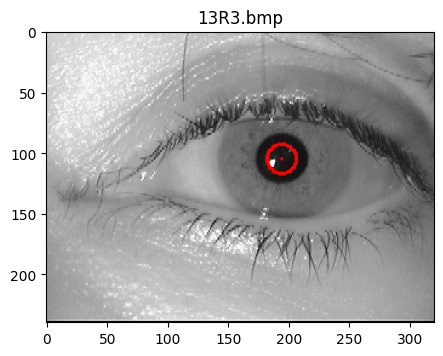

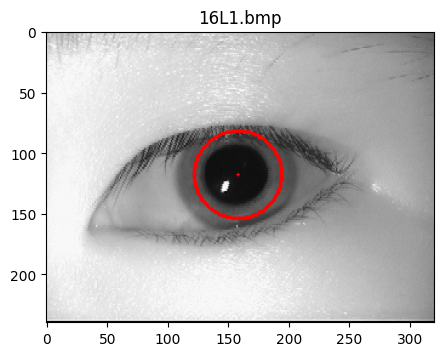

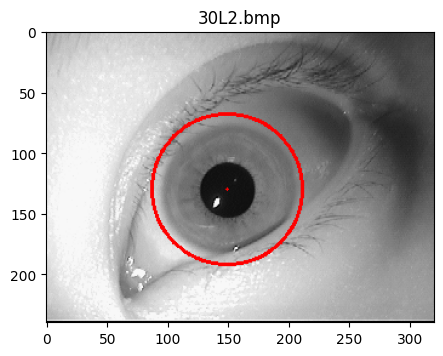

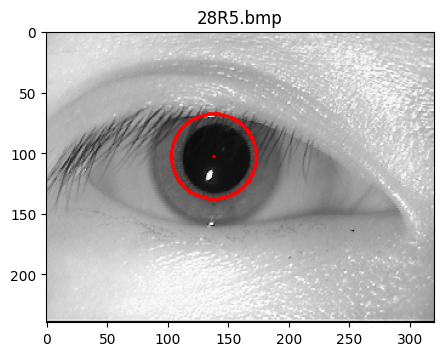

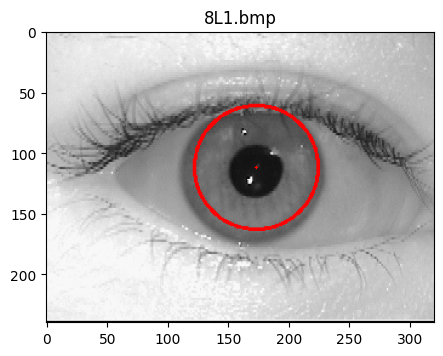

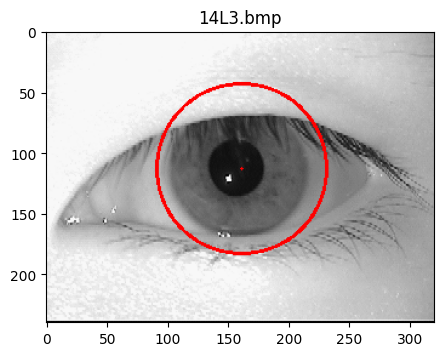

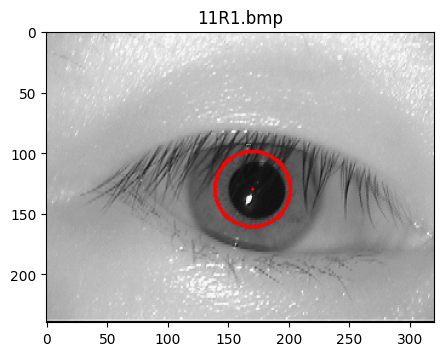

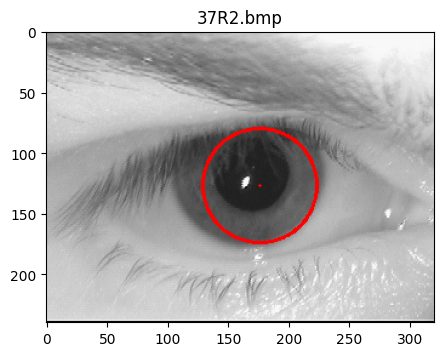

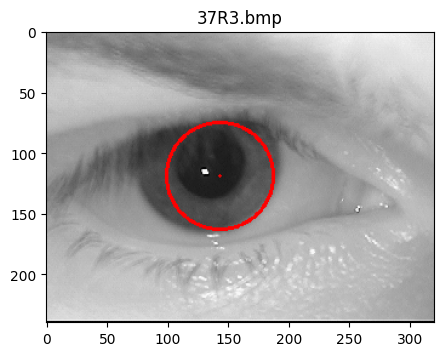

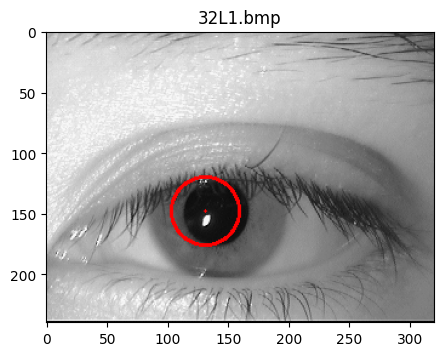

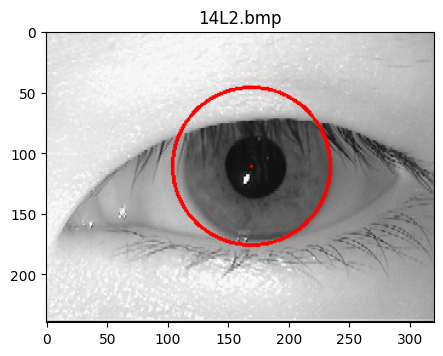

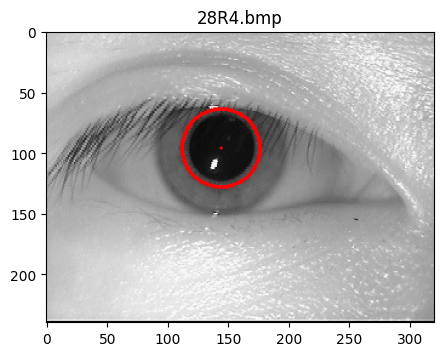

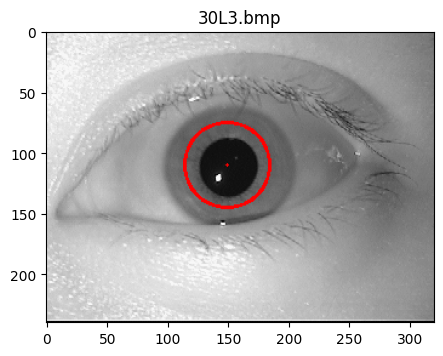

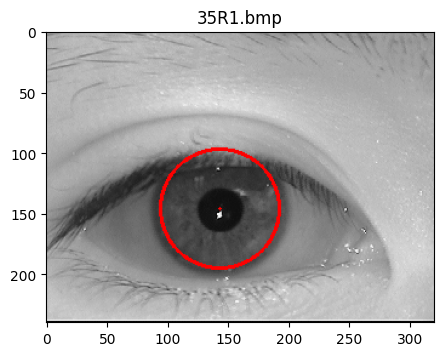

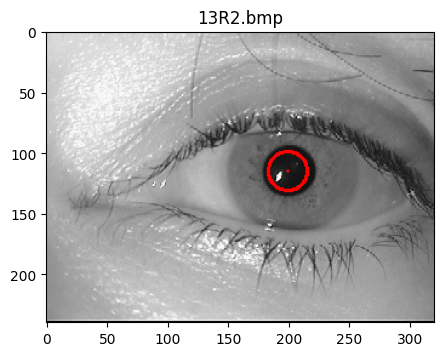

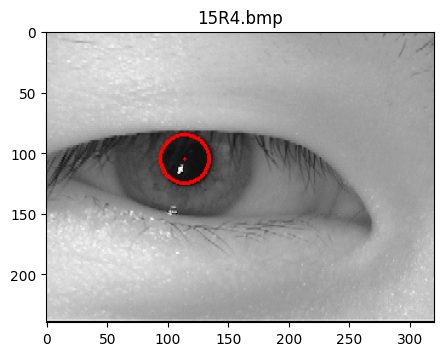

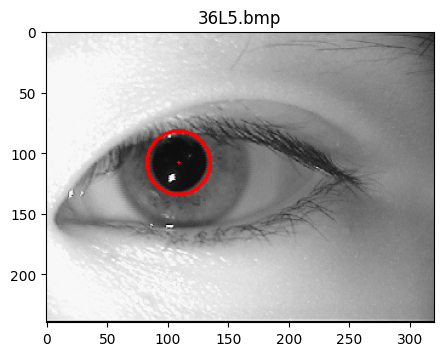

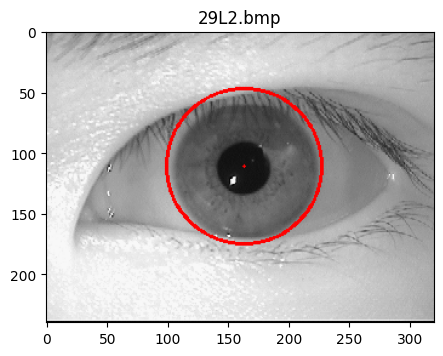

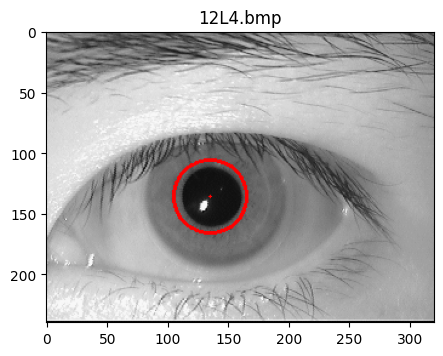

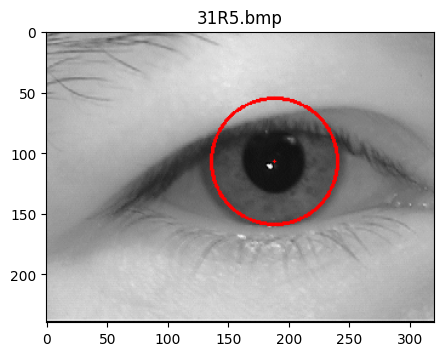

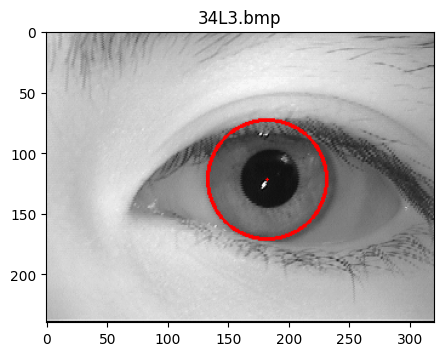

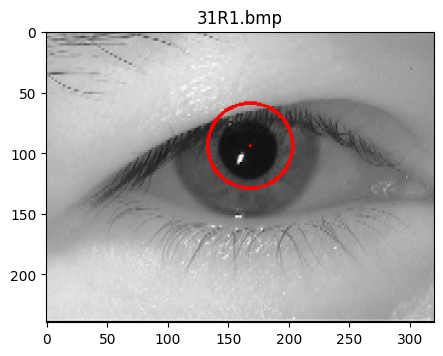

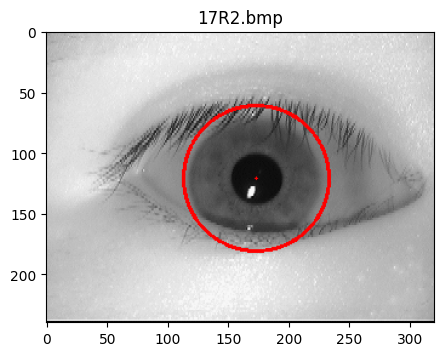

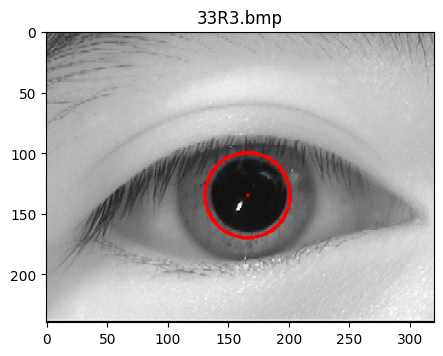

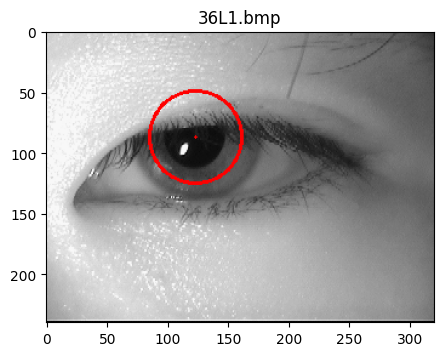

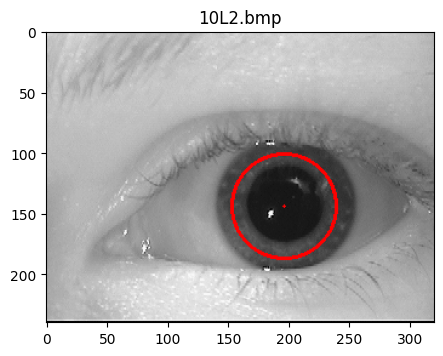

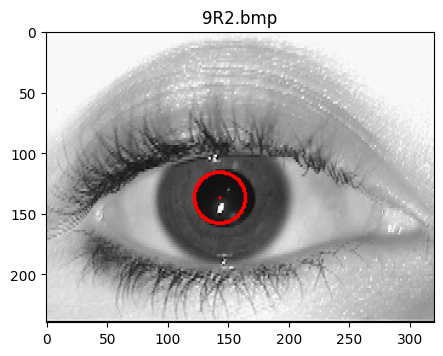

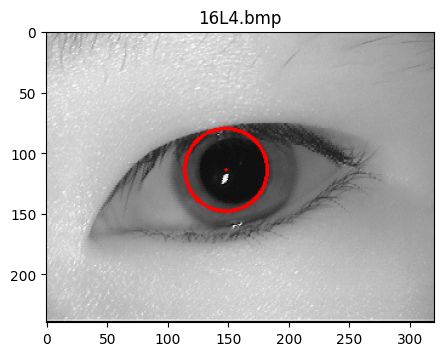

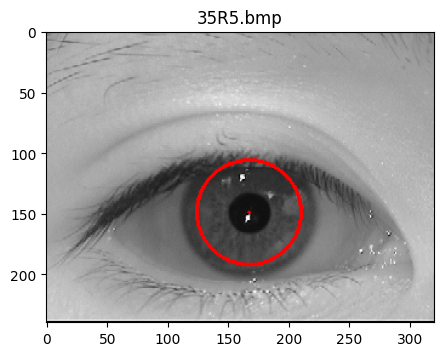

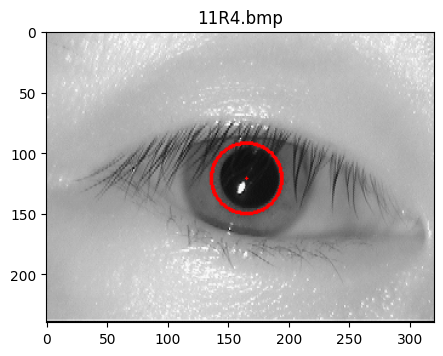

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from funcs import *
from Gabor import *


for photo in os.listdir('eyes')[30:60]:
    if photo.endswith('.bmp'):
        try:
            image_raw = cv2.imread(f'eyes/{photo}', 0)
            image_center_pupil, (x, y), radius_pupil = get_pupil(image_raw)
            image_center_iris, (x, y), radius_iris = get_iris(image_raw, x, y, radius_pupil)

            plt.figure(figsize=(5, 5))
            plt.title(photo)
            plt.imshow(image_center_iris, cmap='gray')
            
        except Exception as e:
            print(f"Error processing {photo}: {e}")
            continue